In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import random

from k12libs.utils.nb_easy import K12AI_NBDATA_ROOT
from k12libs.utils.nb_easy import k12ai_set_notebook
k12ai_set_notebook(cellw=95)

In [2]:
#1、定义数据集路径
cocoRoot = f'{K12AI_NBDATA_ROOT}/cv/det'
dataType = 'val2017'
annFile = os.path.join(cocoRoot, f'annotations/instances_{dataType}.json')
annFile 

'/data/nb_data/cv/det/annotations/instances_val2017.json'

In [3]:
#2、为实例注释初始化COCO的API
coco=COCO(annFile)
 
#3、采用不同函数获取对应数据或类别
ids = coco.getCatIds('person')[0]    #采用getCatIds函数获取"person"类别对应的ID
ids

loading annotations into memory...
Done (t=0.94s)
creating index...
index created!


1

In [4]:
cid = coco.getCatIds(['dog', 'cat'])  # 获取某一类的所有图片
cid

[17, 18]

In [5]:
imgIds = coco.catToImgs[cid[0]]
imgIds[:10]

[157807, 109055, 23272, 134096, 501523, 125850, 284623, 245764, 466156, 402473]

In [6]:
cats = coco.loadCats(cid[0]) # 采用loadCats函数获取序号对应的类别名称
cats

[{'supercategory': 'animal', 'id': 17, 'name': 'cat'}]

In [7]:
imgIds = coco.getImgIds(catIds=[1])    # 采用getImgIds函数获取满足特定条件的图片（交集），获取包含person的所有图片
imgIds[:10]

[532481, 458755, 385029, 311303, 393226, 532493, 8211, 327701, 188439, 434204]

In [8]:
#4、将图片进行可视化
imgId = imgIds[:3]
imgInfo = coco.loadImgs(imgId)
imgInfo 

[{'license': 3,
  'file_name': '000000532481.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg',
  'height': 426,
  'width': 640,
  'date_captured': '2013-11-20 16:28:24',
  'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg',
  'id': 532481},
 {'license': 1,
  'file_name': '000000458755.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000458755.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-16 23:06:51',
  'flickr_url': 'http://farm6.staticflickr.com/5119/5878453277_eea657a01d_z.jpg',
  'id': 458755},
 {'license': 1,
  'file_name': '000000385029.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000385029.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-21 05:40:19',
  'flickr_url': 'http://farm5.staticflickr.com/4061/4670536748_8c7bd89494_z.jpg',
  'id': 385029}]

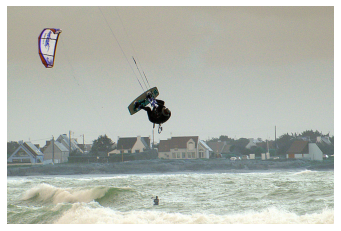

In [9]:
imPath = os.path.join(cocoRoot, 'images', dataType, imgInfo[0]['file_name'])                     
im = cv2.imread(imPath)
plt.axis('off')
plt.imshow(im)
plt.show()

In [10]:
annIds = coco.getAnnIds(imgIds=imgInfo[0]['id'])      # 获取该图像对应的anns的Id
annIds

[508910,
 1342996,
 1347500,
 1349978,
 1354793,
 1358570,
 1779263,
 2021158,
 2089641,
 2181820]

In [15]:
anns = coco.loadAnns(annIds)
anns[1:3]

[{'segmentation': [[446.65,
    301.37,
    437.02,
    302.04,
    436.02,
    301.54,
    435.35,
    297.72,
    438.34,
    296.89,
    438.68,
    294.73,
    447.15,
    294.23,
    448.81,
    298.05,
    448.48,
    301.04]],
  'area': 82.66089999999997,
  'iscrowd': 0,
  'image_id': 532481,
  'bbox': [435.35, 294.23, 13.46, 7.81],
  'category_id': 3,
  'id': 1342996},
 {'segmentation': [[447.44,
    295.96,
    448.07,
    294.22,
    455.81,
    293.91,
    457.0,
    296.04,
    459.21,
    296.83,
    459.6,
    300.22,
    456.68,
    301.56,
    453.76,
    300.77,
    448.15,
    300.85]],
  'area': 72.87609999999988,
  'iscrowd': 0,
  'image_id': 532481,
  'bbox': [447.44, 293.91, 12.16, 7.65],
  'category_id': 3,
  'id': 1347500}]

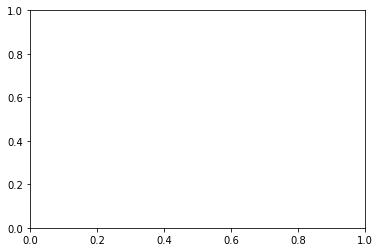

In [18]:
coco.showAnns(anns);

(-0.5, 639.5, 425.5, -0.5)

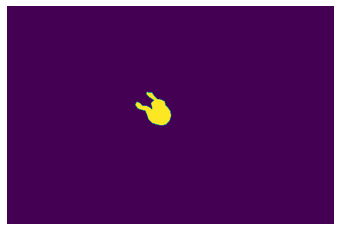

In [19]:
mask = coco.annToMask(anns[0])
plt.imshow(mask);
plt.axis('off')